In [16]:
import matplotlib.pyplot as plt
import sarracen as src
import numpy as np

In [17]:
sdf_ini = src.read_csv('../Data/initial_distribution/toy_star.csv')

In [18]:
dm = 1/len(sdf_ini)
hfact = 1.2

In [19]:
sdf_ini.params={'mass':dm, 'hfact':hfact}
sdf_ini.calc_density()
sdf_ini

,x,y,z,vx,vy,vz,h,rho
0,-0.18750,-0.28125,-0.65625,0,0,0,0.1125,0.577094
1,-0.09375,-0.28125,-0.65625,0,0,0,0.1125,0.577094
2,0.00000,-0.28125,-0.65625,0,0,0,0.1125,0.577094
3,0.09375,-0.28125,-0.65625,0,0,0,0.1125,0.577094
4,0.18750,-0.28125,-0.65625,0,0,0,0.1125,0.577094
...,...,...,...,...,...,...,...,...
2098,-0.18750,0.28125,0.65625,0,0,0,0.1125,0.577094
2099,-0.09375,0.28125,0.65625,0,0,0,0.1125,0.577094
2100,0.00000,0.28125,0.65625,0,0,0,0.1125,0.577094
2101,0.09375,0.28125,0.65625,0,0,0,0.1125,0.577094


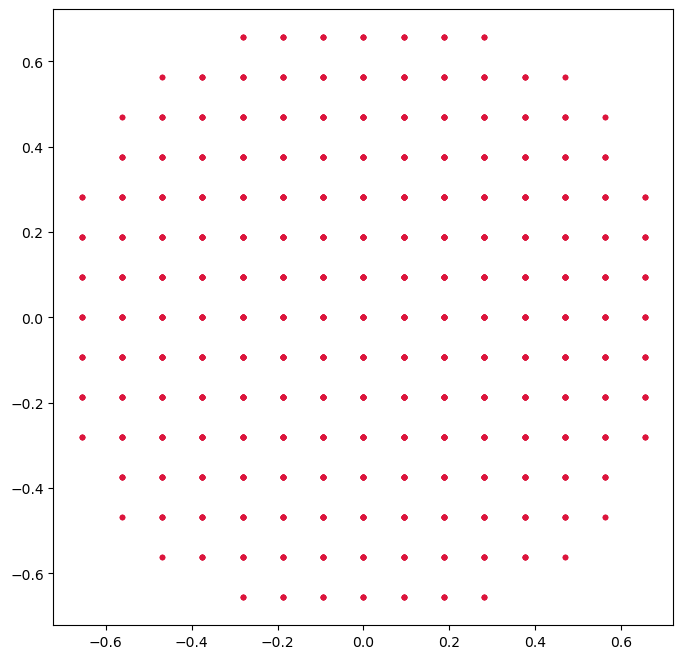

In [20]:
fig = plt.figure(figsize=(8,8))
plt.plot(sdf_ini['x'], sdf_ini['y'], '.', color='crimson')
plt.show()

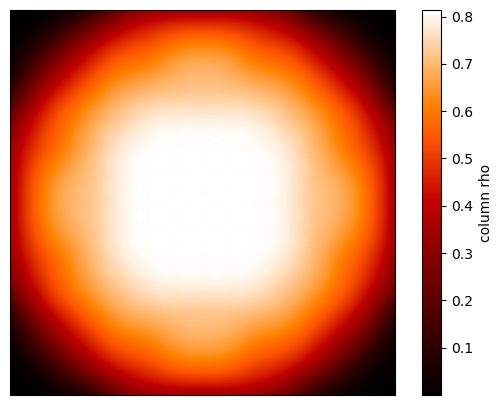

In [22]:
fig, ax = plt.subplots(figsize=(7,5))
ax = sdf_ini.render('rho', ax=ax, rotation=[0,0,0])

In [8]:
sdf = src.read_csv('../Data/results/toy_star/final.csv')
sdf.params={'mass':dm, 'hfact':hfact}
sdf.calc_density()
sdf

,x,y,z,vx,vy,vz,h,u,rho
0,-7.766445e-02,-0.129834,-0.310793,-5.671610e-02,-0.095921,-0.229525,0.068298,2.404009,2.579193
1,-5.350623e-02,-0.132606,-0.314682,-3.991799e-02,-0.097710,-0.232312,0.068297,2.404022,2.579235
2,4.300000e-15,-0.153404,-0.309651,2.100000e-15,-0.113445,-0.228758,0.068282,2.403971,2.580933
3,5.350623e-02,-0.132606,-0.314682,3.991799e-02,-0.097710,-0.232312,0.068297,2.404022,2.579235
4,7.766445e-02,-0.129834,-0.310793,5.671610e-02,-0.095921,-0.229525,0.068298,2.404009,2.579193
...,...,...,...,...,...,...,...,...,...
2098,-7.766445e-02,0.129834,0.310793,-5.671610e-02,0.095921,0.229525,0.068298,2.404009,2.579193
2099,-5.350623e-02,0.132606,0.314682,-3.991799e-02,0.097710,0.232312,0.068297,2.404022,2.579235
2100,2.600000e-15,0.153404,0.309651,7.000000e-16,0.113445,0.228758,0.068282,2.403971,2.580933
2101,5.350623e-02,0.132606,0.314682,3.991799e-02,0.097710,0.232312,0.068297,2.404022,2.579235


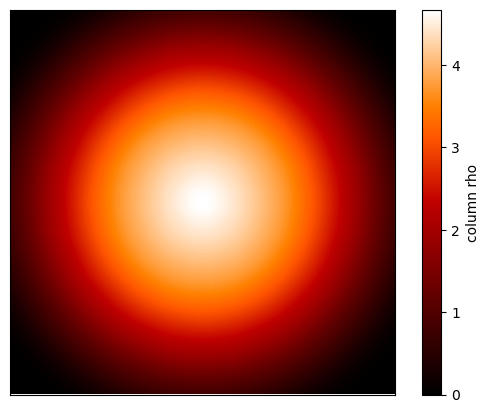

In [9]:
fig, ax = plt.subplots(figsize=(7,5))
ax = sdf.render('rho', ax=ax, rotation=[0,0,0])

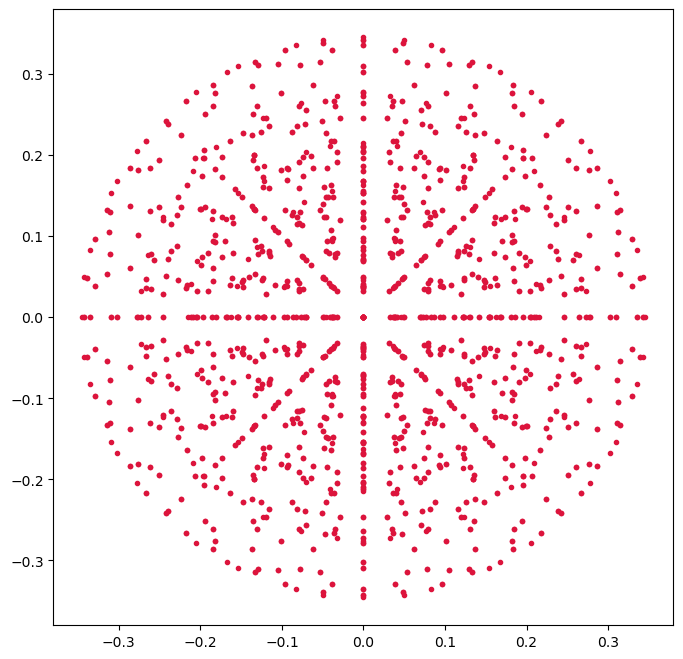

In [10]:
fig = plt.figure(figsize=(8,8))
plt.plot(sdf['x'], sdf['y'], '.', color='crimson')
plt.show()

# Density Distribution

In [11]:
def density_theo(r, R, lmbda, k):
    return lmbda/(4*k)*(R**2-r**2)

In [12]:
R = 0.75
k = 0.05
M = 1.0
n = 1.0
gamma = 2.0
#lmbda = 2*k / (np.pi**(1/n)) * (M*(1+n)/R**2)**(1+1/n)/M
lmbda = 4.*k/np.pi**(1.5) * (3.32335 * M/(R*R*R))/(R*R);

In [13]:
4./3.*np.pi*R**3. *np.mean(sdf['rho'])

8.39056497415508

In [14]:
r = np.linspace(0.001, 1.1*R, 100)
dens = density_theo(r, R, lmbda, k)

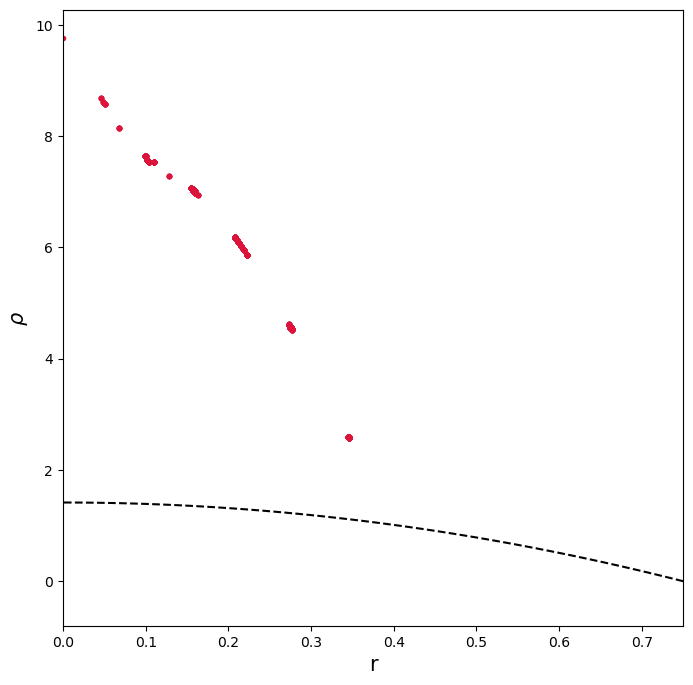

In [15]:
fig = plt.figure(figsize=(8,8))
plt.plot(np.sqrt(sdf['x']**2+sdf['y']**2+sdf['z']**2), sdf['rho'], '.', color='crimson')
plt.plot(r, dens, '--', color='k')
plt.xlim(0., R)
plt.xlabel("r", fontsize=15)
plt.ylabel(r"$\rho$", fontsize=15)
plt.show()